In [12]:
# sudo apt install graphviz -y

In [13]:
!pip install jedi
!pip install pydot


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [14]:
%config IPCompleter.use_jedi=True

In [15]:
import numpy as np
from tensorflow.keras import datasets, utils

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, utils

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

NUM_CLASSES = 10

# Convert the labels to one hot encoding
y_train = utils.to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = utils.to_categorical(y_test, num_classes=NUM_CLASSES)


# Define a function to preprocess the images
def preprocess_images(images):
    images = tf.cast(images, tf.float32) / 255.0
    return images


# Define a function to preprocess the data
def preprocess_data(images, labels):
    images = preprocess_images(images)
    return images, labels


# Convert the numpy arrays to tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Use the .map method to apply the preprocessing function to the dataset
train_ds = train_ds.map(preprocess_data).shuffle(True).batch(32)

test_ds = test_ds.map(preprocess_data).batch(32)

In [17]:
from tensorflow.keras import layers, models

In [18]:
input_layer = layers.Input(shape=(32, 32, 3))

x = layers.Flatten()(input_layer)

x = layers.Dense(units=200, activation="relu")(x)

x = layers.Dense(units=150, activation="relu")(x)
output_layer = layers.Dense(units=10, activation="softmax")(x)
model = models.Model(input_layer, output_layer)

In [19]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.0005)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

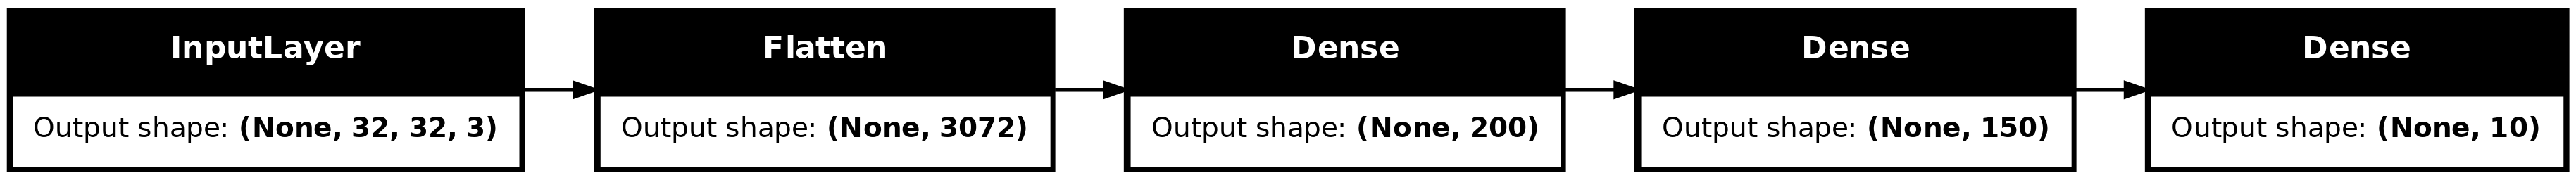

In [21]:
import tensorflow as tf
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True, rankdir="LR")

In [22]:
model.fit(
    train_ds,
    epochs=10,
)

Epoch 1/10


I0000 00:00:1710902277.640440   62898 service.cc:145] XLA service 0x7fda98003da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1710902277.640499   62898 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-03-20 09:37:57.660870: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-20 09:37:57.765444: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1710902280.842772   63794 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_413', 80 bytes spill stores, 80 bytes spill loads

I0000 00:00:1710902281.111237   63796 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_413', 12 bytes spill stores, 12 bytes spill loads

  42/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1422 - loss: 2.3381

I0000 00:00:1710902283.285737   62898 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.2846 - loss: 1.9613
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3938 - loss: 1.6856
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4297 - loss: 1.5961
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4503 - loss: 1.5379
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4631 - loss: 1.4963
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4748 - loss: 1.4613
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4845 - loss: 1.4347
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4947 - loss: 1.4087
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5041 - loss: 1.3866
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5127 - loss: 1.3693


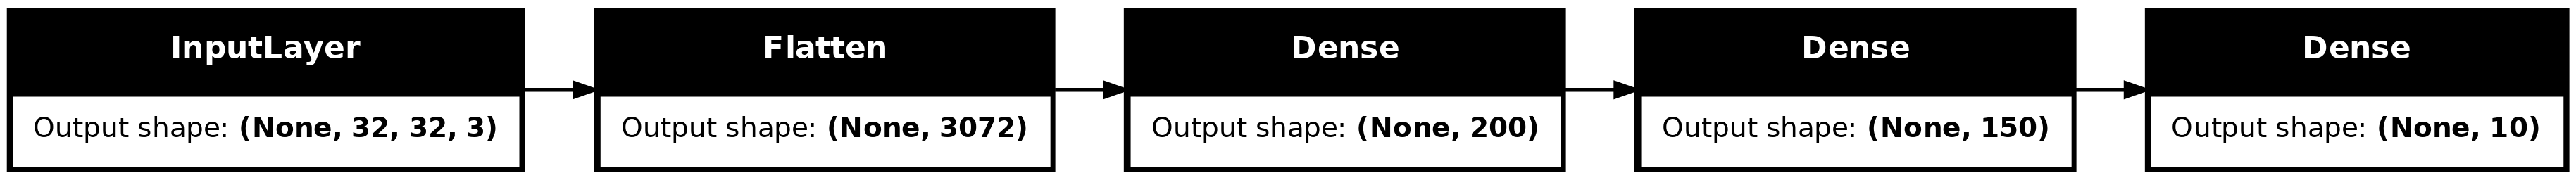

In [23]:
utils.plot_model(model, show_shapes=True, rankdir="LR")

In [30]:
model.evaluate(test_ds)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4744 - loss: 1.4840


[1.4810092449188232, 0.4778999984264374]

In [32]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)
preds = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [34]:
preds_single = CLASSES[np.argmax(preds, axis=-1)]

In [37]:
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

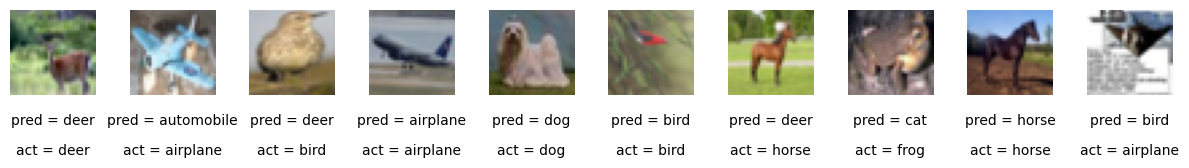

In [38]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)